## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [3]:
data = pd.read_csv("./Titanic_train.csv")
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## 觀察 Age

In [5]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = data.isnull().sum()/len(data)
print(missing_vals)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64
             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


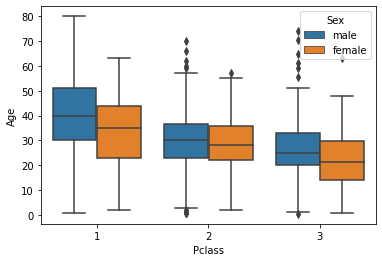

In [6]:
# 觀察資料
# 性別和年紀的關係
g = sns.boxplot(x="Pclass", y="Age", hue="Sex",
               data=data)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


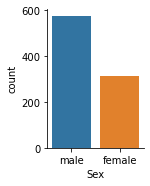

In [7]:
#男生女生個數
g = sns.catplot("Sex",data=data,kind="count", height=2.5, aspect=.8)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


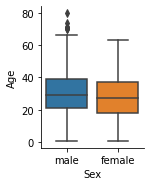

In [8]:
#男生女生中年齡分布
g = sns.catplot("Sex",'Age',data=data,kind="box", height=2.5, aspect=.8)
plt.show()

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Sex']= le.fit_transform(data['Sex'])
print(data['Sex'])
data = data[['Pclass','Sex','Age']]
from sklearn.metrics.pairwise import nan_euclidean_distances
print(pd.DataFrame(nan_euclidean_distances(data)))

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
           0          1          2          3          4         5    \
0     0.000000  16.155494   4.123106  13.190906  13.000000  0.000000   
1    16.155494   0.000000  12.165525   3.000000   3.741657  2.738613   
2     4.123106  12.165525   0.000000   9.219544   9.055385  1.224745   
3    13.190906   3.000000   9.219544   0.000000   2.236068  2.738613   
4    13.000000   3.741657   9.055385   2.236068   0.000000  0.000000   
..         ...        ...        ...        ...        ...       ...   
886   5.099020  11.090537   1.732051   8.124038   8.062258  1.224745   
887   3.741657  19.000000   7.280110  16.000000  16.155494  2.738613   
888   1.224745   2.449490   0.000000   2.449490   1.224745  1.224745   
889   4.472136  12.041595   2.236068   9.055385   9.219544  2.449490   
890  10.000000   6.403124   6.082763   3.741657   3.000000  0.000000   


<ipython-input-10-ea8c5e214a05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']= le.fit_transform(data['Sex'])


       0    1      2    3
0    3.0  1.0  22.00  0.0
1    1.0  0.0  38.00  0.0
2    3.0  0.0  26.00  0.0
3    1.0  0.0  35.00  0.0
4    3.0  1.0  35.00  0.0
..   ...  ...    ...  ...
886  2.0  1.0  27.00  0.0
887  1.0  0.0  19.00  0.0
888  3.0  0.0  13.95  1.0
889  1.0  1.0  26.00  0.0
890  3.0  1.0  32.00  0.0

[891 rows x 4 columns]
0    False
1    False
2    False
3    False
dtype: bool


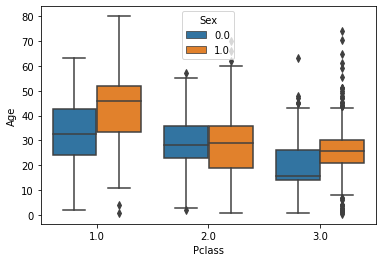

In [11]:
k = 5
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=k, add_indicator = True, weights = 'uniform')
df_filled = pd.DataFrame(imputer.fit_transform(data))
print(df_filled)
print(df_filled.isnull().any()) # 檢查都沒有遺失值
df_filled.rename(columns={0:'Pclass', 1:'Sex', 2:'Age',3:'imputer.Age'}, inplace = True)
sns.boxplot(x='Pclass', y='Age',hue='Sex', data=df_filled)
plt.show()

       0       1      2    3
0    3.0     0.0  22.00  0.0
1    1.0  1000.0  38.00  0.0
2    3.0  1000.0  26.00  0.0
3    1.0  1000.0  35.00  0.0
4    3.0     0.0  35.00  0.0
..   ...     ...    ...  ...
886  2.0     0.0  27.00  0.0
887  1.0  1000.0  19.00  0.0
888  3.0  1000.0  15.75  1.0
889  1.0     0.0  26.00  0.0
890  3.0     0.0  32.00  0.0

[891 rows x 4 columns]


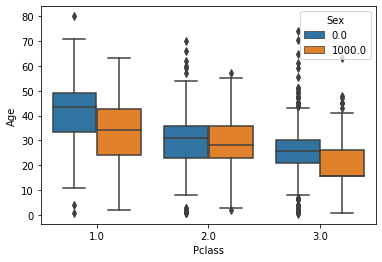

In [12]:
# sex 類別- 類別資料轉換對於 KNN 的影響
data = pd.read_csv("Titanic_train.csv")
data['Sex'].replace({'male':0, 'female':1000},inplace = True)
data = data[['Pclass','Sex','Age']]
K=5
imputer = KNNImputer(n_neighbors = K, add_indicator = True, weights = 'uniform')
df_filled = pd.DataFrame(imputer.fit_transform(data))
print(df_filled)
df_filled.rename(columns={0:'Pclass', 1:'Sex', 2:'Age',3:'imputer.Age'}, inplace = True)
sns.boxplot(x='Pclass', y='Age',hue='Sex', data=df_filled)
plt.show()

In [13]:
# 判斷補值的好壞?
# Step1:取無遺失值的資料集
# Step2:隨機取幾個資料點，當作遺失值
# Step3:以step2產生的遺失值進行補值
# Step4: 計算MSE看補值的效果。
data = pd.read_csv("Titanic_train.csv")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Sex']= le.fit_transform(data['Sex'])
print(data['Sex'])
data = data[['Pclass','Sex','Age']]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32


In [14]:
# Step1:取無遺失值的資料集
import random
completet_data = data.dropna()
completet_data = completet_data.reset_index(drop=True)
print(completet_data)
# Step2:隨機取幾個資料點，當作遺失值
a = random.sample(list(completet_data.index),10)
miss_data = completet_data.copy()
miss_data['Age'].iloc[a] = np.nan
# Step3:以step2產生的遺失值進行補值
k = 5
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=k, add_indicator = True, weights = 'uniform')
verify_impute = pd.DataFrame(imputer.fit_transform(miss_data))
verify_impute.rename(columns={0:'Pclass', 1:'Sex', 2:'Age',3:'imputer.Age'}, inplace = True)
print(verify_impute)
# 判斷 df_filled 和 data 的距離
# Step4: 計算MSE看補值的效果。
from sklearn.metrics import mean_squared_error
y1 = completet_data['Age']
y2 = verify_impute['Age'] 
MSE_h = mean_squared_error(y1,y2)
print(MSE_h)

     Pclass  Sex   Age
0         3    1  22.0
1         1    0  38.0
2         3    0  26.0
3         1    0  35.0
4         3    1  35.0
..      ...  ...   ...
709       3    0  39.0
710       2    1  27.0
711       1    0  19.0
712       1    1  26.0
713       3    1  32.0

[714 rows x 3 columns]
     Pclass  Sex   Age  imputer.Age
0       3.0  1.0  23.8          1.0
1       1.0  0.0  38.0          0.0
2       3.0  0.0  26.0          0.0
3       1.0  0.0  35.0          0.0
4       3.0  1.0  35.0          0.0
..      ...  ...   ...          ...
709     3.0  0.0  39.0          0.0
710     2.0  1.0  27.0          0.0
711     1.0  0.0  19.0          0.0
712     1.0  1.0  26.0          0.0
713     3.0  1.0  32.0          0.0

[714 rows x 4 columns]
2.293011142857143


D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
